# Домашнее задание 

В этом задании мы попрактикуемся в методах снижения размерности и кластеризации данных. 

## Задание 1. Кластеризация типов движений (5 баллов)

В этой части задания мы будем работать с набором данных Samsung Human Activity Recognition. Скачайте данные по ссылке https://yadi.sk/d/_WFxgSIuBF06Rg. Данные поступают с акселерометров и гироскопов мобильных телефонов Samsung Galaxy S3, также известен вид активности человека с телефоном в кармане – ходил ли он, стоял, лежал, сидел или шел вверх/вниз по лестнице.

Представим, что вид активности нам неизвестнен, и попробуем кластеризовать людей чисто на основе имеющихся признаков.

Также есть методичка/овервью от sklearn:
[Методичка](https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation)

In [1]:
import numpy as np
import seaborn as sns
from sklearn import metrics
from matplotlib import pyplot as plt


plt.style.use(['seaborn-darkgrid'])
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'

%matplotlib inline
%config InlineBackend.figure_format="retina"

RANDOM_STATE = 42

### Задание 1.0 (0.1 балл)
Прочитайте данные из файлов и объедините тестовую и обучающие выборки.

В файлах ```..._labels``` лежат настоящие классы. Их также объедините, но в отдельную переменную (например ```y```). Данный вектор для кластеризации нам не нужен, но мы будем смотреть по нему метрики.

In [2]:
X = []
y = []
with open('samsung_HAR/samsung_train.txt') as f:
    lines = f.readlines()
    for i in lines:
        X.append([float(j) for j in i.split()])
with open('samsung_HAR/samsung_test.txt') as f:
    lines = f.readlines()
    for i in lines:
        X.append([float(j) for j in i.split()])
with open('samsung_HAR/samsung_train_labels.txt') as f:
    lines = f.readlines()
    y.extend([int(i.strip('\n')) for i in lines])
with open('samsung_HAR/samsung_test_labels.txt') as f:
    lines = f.readlines()
    y.extend([int(i.strip('\n')) for i in lines])
X = np.array(X)

In [3]:
np.unique(y)

array([1, 2, 3, 4, 5, 6])

Эти метки соответствуют:

1 - ходьбе,
2 - подъему вверх по лестнице,
3 - спуску по лестнице,
4 - сидению,
5 - стоянию,
6 - лежанию

### Задание 1.1 (0.5 баллов)

Отмасштабируйте выборку с помощью ```StandardScaler```.

[Документация](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [4]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Задание 1.2 (0.6 баллов)

Понизьте размерность с помощью ```PCA```, оставляя столько компонент, сколько нужно для того, чтобы объяснить как минимум 90% дисперсии отмасштабированных данных. ```random_state``` используйте из объявленной в самом начале переменной ```RANDOM_STATE``` (42).

[Документация](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

In [5]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_scaled)
print(len(pca.explained_variance_ratio_))
getting = [i for i in pca.explained_variance_ratio_ if abs(i) > 0.001]
print(len(getting))

561
98


In [6]:
pca = PCA(n_components=80)
X_pca = pca.fit_transform(X_scaled)
pca.explained_variance_ratio_.sum()

0.922991008478434

### Задание 1.3 (0.3 баллов)

Визуализируйте данные в проекции на первые две главные компоненты. Используйте ```cmap="virdis"``` или любой другой, с которым будет красиво :)

In [7]:
X_pca.shape

(10299, 80)

Text(0.5, 1.0, 'Data after PCA')

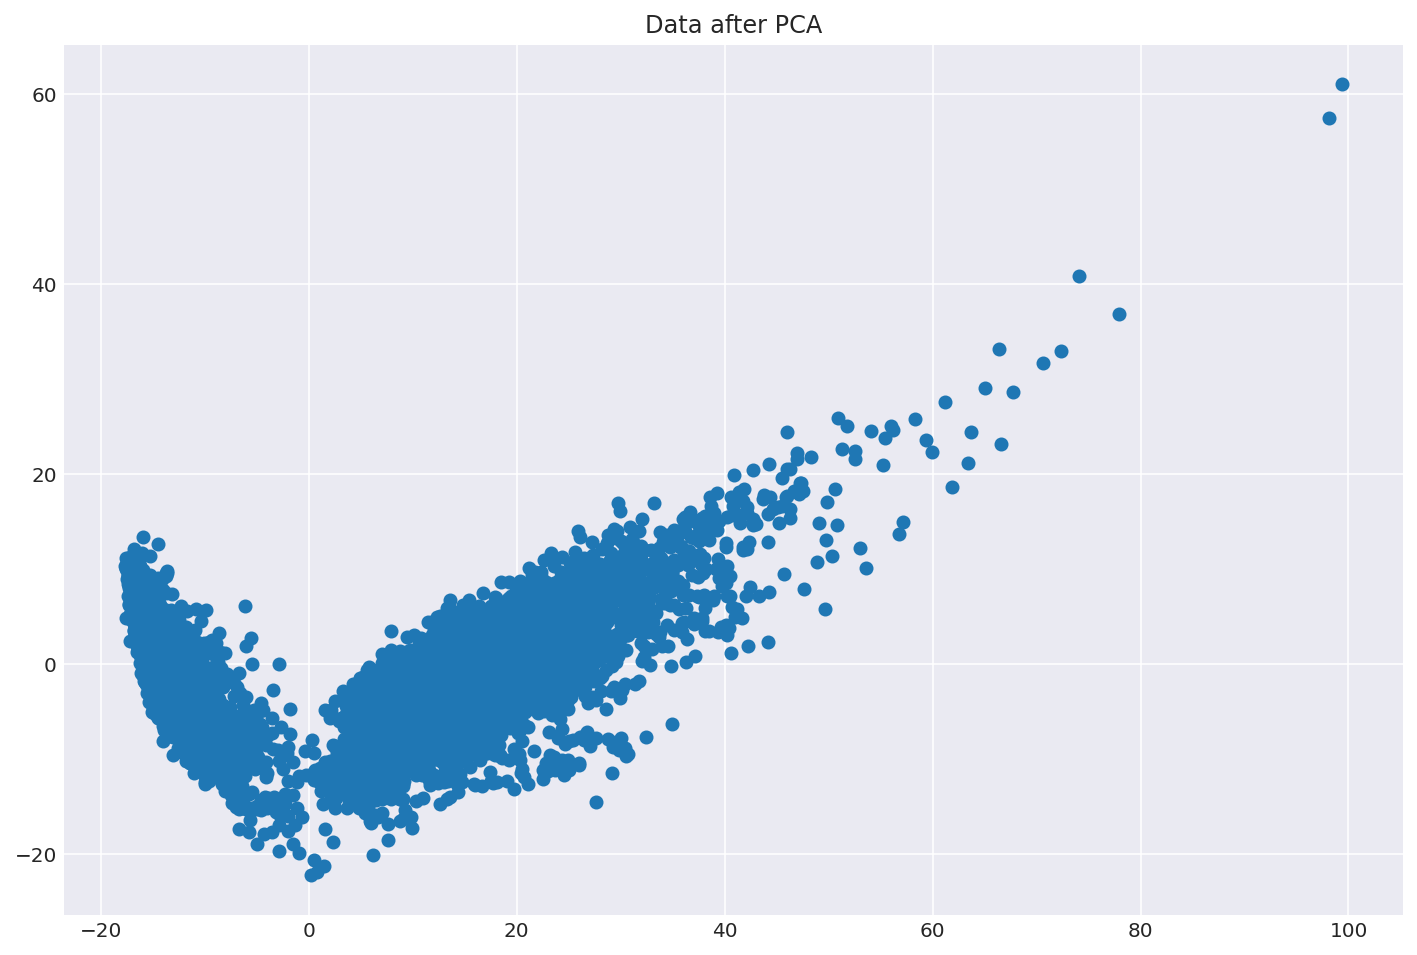

In [13]:
plt.figure(figsize=(12,8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap='viridis')
plt.title('Data after PCA')

### Задание 1.4 (0.4 балла)

Сделайте кластеризацию данных методом ```KMeans```, обучив модель на данных со сниженной за счет ```PCA```
размерностью. В данном случае нужно искать 6 кластеров (изначально у нас 6 классов). Засеките время обучения и время инференса.

Параметры:

```n_clusters = 6``` (число уникальных меток целевого класса = 6)

```n_init = 100```

```random_state = RANDOM_STATE``` (для воспроизводимости результата, не забывайте указывать его и дальше!)

[Документация](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

In [16]:
%%time
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=6, n_init = 100, random_state=RANDOM_STATE)
kmeans.fit(X_pca)

CPU times: user 22.5 s, sys: 922 ms, total: 23.4 s
Wall time: 3.1 s


KMeans(n_clusters=6, n_init=100, random_state=42)

### Задание 1.5 (0.2 балла)

Визуализируйте данные в проекции на первые две главные компоненты. Раскрасьте точки в соответствии с полученными метками кластеров.

Text(0.5, 1.0, 'KMeans resulting clusters')

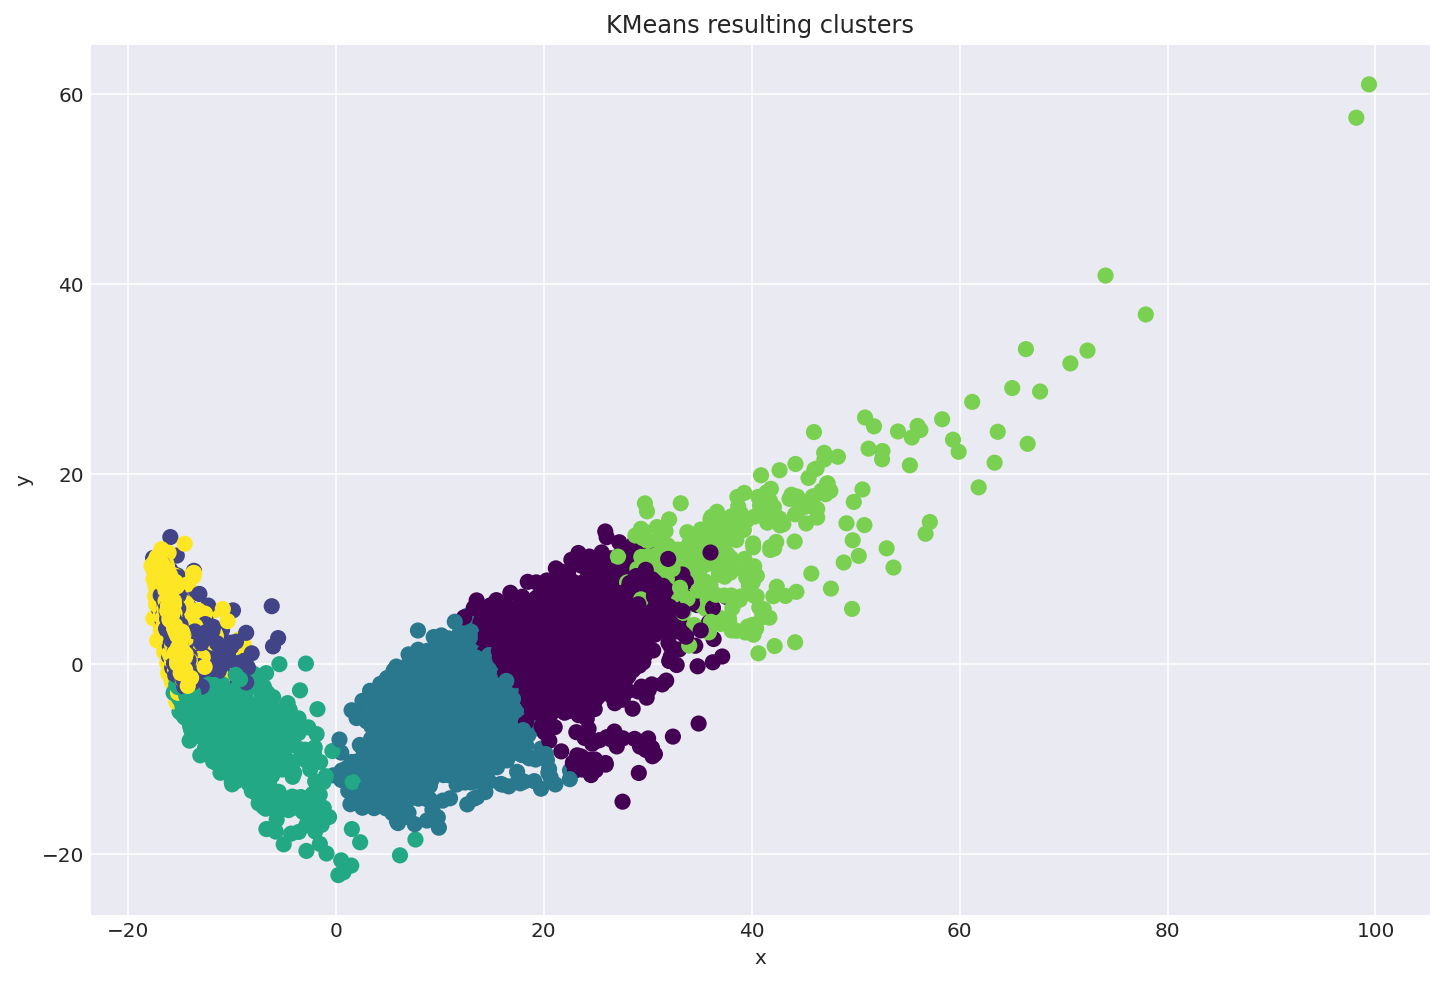

In [17]:
plt.figure(figsize=(12,8))
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans.labels_, s=50, cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')
plt.title('KMeans resulting clusters')

### Задание 1.6 (0.3 баллов)

Выберите какие-то метрики (минимум две) из известных вам или из методички (ссылка в начале дз, пункт 2.3.10), объясните ваш выбор.

Выведите на экран значения метрик качества кластеризации и используйте их далее.

In [58]:
print('homogeneity_score=', metrics.homogeneity_completeness_v_measure(y, kmeans.labels_))
print('silhouette_score=', metrics.silhouette_score(X_pca, kmeans.labels_))
print('accuracy_score=', metrics.accuracy_score(y, kmeans.labels_))

homogeneity_score= (0.5403973039226383, 0.5805316911878496, 0.5597460001980608)
silhouette_score= 0.13266048498593452
accuracy_score= 0.12030294203320711


🐖 Для сравнения я выбрала метрики homogeneity_completeness_v_measure и rand_score. Первая метрика показывает 3 показателя качества кластеризации: однородность, полноту и v-меру. Вторая метрика учитывает случайность попадания объекта в кластер, поэтому эта метрика выше чем первая.

### Задание 1.7 (0.8 баллов)
Теперь попробуем сделать кластеризацию с помощью ```AgglomerativeClustering```.

Вновь визуализируйте данные с раскраской по полученным меткам и выведите метрики. Засеките время обучения и время инференса. Сравните с ```KMeans```.

Ответьте на следующие вопросы:
* Стало ли лучше?
* Почему?

[Документация](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

In [21]:
%%time
#☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️
from sklearn.cluster import AgglomerativeClustering


agglo_clustering = AgglomerativeClustering(n_clusters = 6).fit(X_pca)

CPU times: user 5.11 s, sys: 148 ms, total: 5.25 s
Wall time: 5.25 s


Text(0.5, 1.0, 'AgglomerativeClustering resulting clusters')

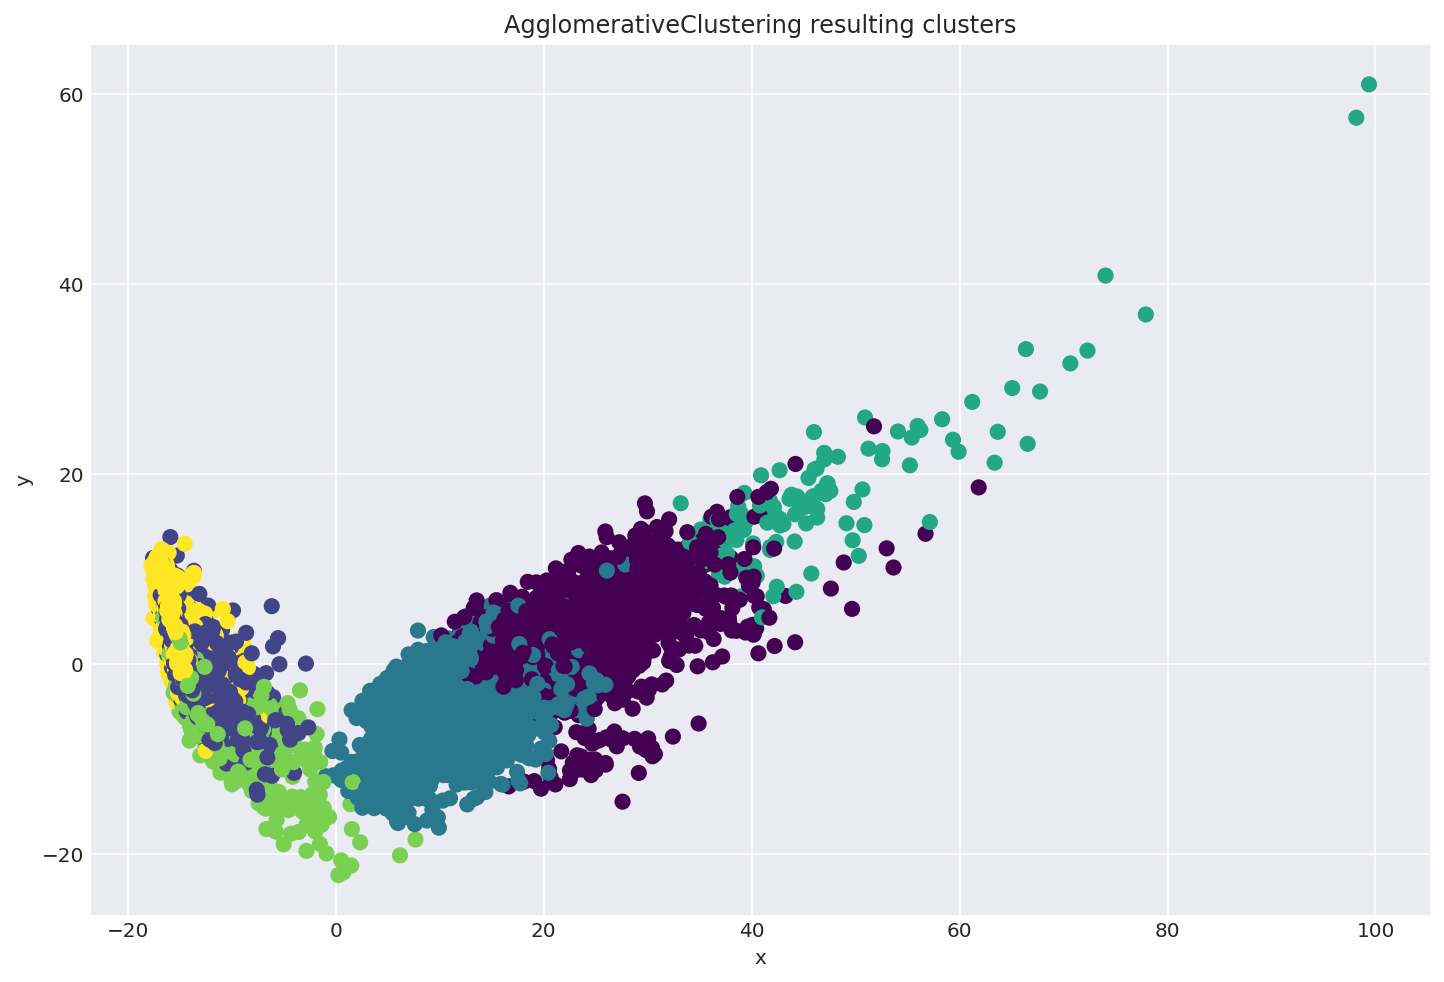

In [22]:
#☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️
plt.figure(figsize=(12,8))
plt.scatter(X_pca[:,0], X_pca[:,1], c=agglo_clustering.labels_, s=50, cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')
plt.title('AgglomerativeClustering resulting clusters')

In [59]:
#☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️
print('homogeneity_score=', metrics.homogeneity_completeness_v_measure(y, agglo_clustering.labels_))
print('silhouette_score=', metrics.silhouette_score(X_pca, agglo_clustering.labels_))
print('accuracy_score=', metrics.accuracy_score(y, agglo_clustering.labels_))

homogeneity_score= (0.5756463299794754, 0.661687628784128, 0.6156754244149482)
silhouette_score= 0.13788443511568124
accuracy_score= 0.16962811923487717


🐫 При сравнении двух методов кластеризации KMeans и AgglomerativeClustering можно заметить, что кластеры почти одинаково были построены, только жесткое деление прямой элементов по кластерам на границе в случае KMeans, немного понизило его скор. Логически рассуждая, можно предположить, что на границе перемешивание элементов ожидаемая ситуация, только как их все же разделить зависит от выбора метода кластеризации.

### Задание 1.8 (0.8 баллов)

Попробуйте применить другие методы кластеризации из sklearn.  Засеките время обучения и время инференса. Также вычислите метрики качества, визуализируйте результаты, после чего сделайте вывод о том, какой метод сработал лучше.

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.72 µs
eps= 4 n= 2 score: -0.2966252642328563
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs
eps= 6 n= 2 score: -0.4418848927102578
CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.25 µs
eps= 8 n= 2 score: -0.33459369666692484
CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.25 µs
eps= 10 n= 2 score: -0.20636662939108208
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 5.96 µs
eps= 12 n= 2 score: -0.09525827700016454
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.96 µs
eps= 14 n= 2 score: -0.20581638915120162
CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.96 µs
eps= 16 n= 2 score: -0.08390290920694456
CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.25 µs
eps= 18 n= 2 score: 0.10666104556985591
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs
eps= 4 n= 4 score: -1
CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall ti

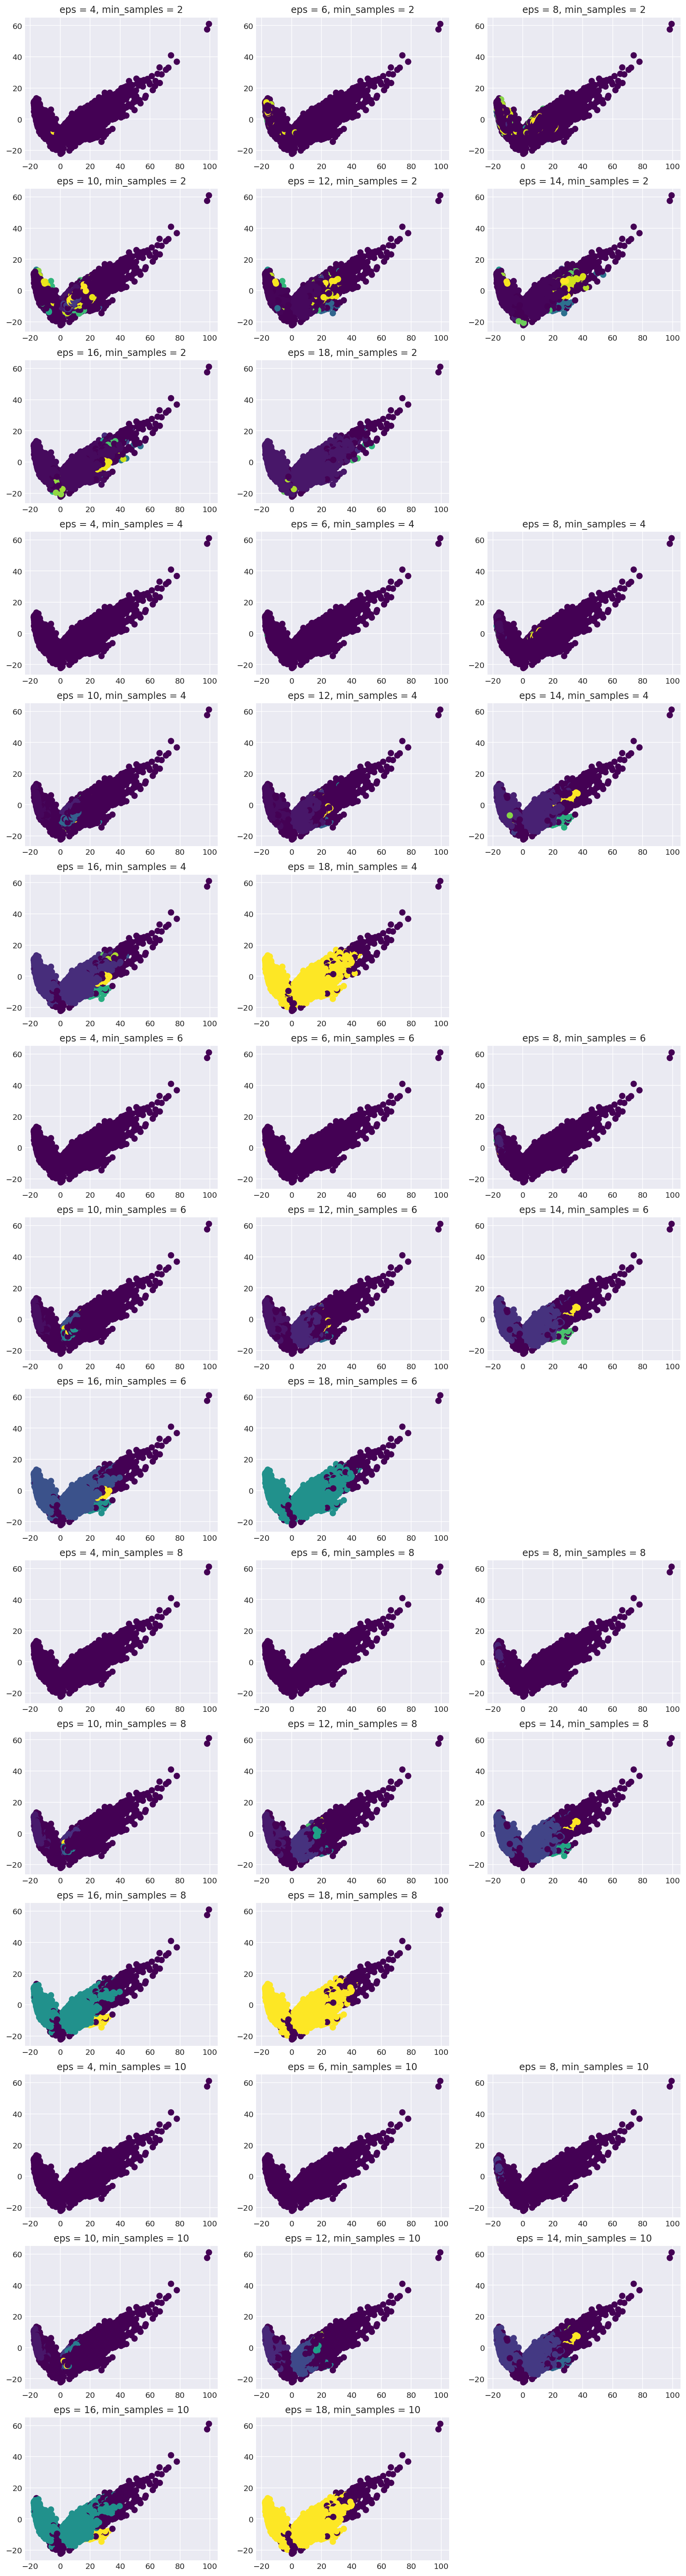

In [44]:
#☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️
from sklearn.cluster import DBSCAN


plt.figure(figsize= (15,100))
i = 1
for samples in [2, 4, 6, 8, 10]:
    for e in range(4, 20, 2):
        %time
        dbscan = DBSCAN(eps=e, min_samples=samples)
        clusters = dbscan.fit_predict(X_pca)
        plt.subplot(25, 3, i)
        plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, s=50, cmap='viridis')
        plt.title('eps = {}, min_samples = {}'.format(e, samples))
        try:
            print('eps=',e,'n=',samples,'score:',metrics.silhouette_score(X_pca, clusters))
        except ValueError:
            print('eps=',e,'n=',samples,'score:',-1)
        i += 1
    i+=1

plt.show()

In [60]:
#☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️
from sklearn.cluster import MeanShift, estimate_bandwidth


bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)
meanshift = MeanShift(bandwidth=bandwidth)
meanshift.fit(X_pca)
print('homogeneity_score=', metrics.homogeneity_completeness_v_measure(y, meanshift.labels_))
print('silhouette_score=', metrics.silhouette_score(X_pca, meanshift.labels_))
print('accuracy_score=', metrics.accuracy_score(y, meanshift.labels_))

homogeneity_score= (0.9965019469270558, 0.19585204523104388, 0.3273640976856862)
silhouette_score= 0.021926805829686858
accuracy_score= 0.0009709680551509856


In [28]:
labels = meanshift.labels_
cluster_centers = meanshift.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 9552


Text(0.5, 1.0, 'MeanShift resulting clusters')

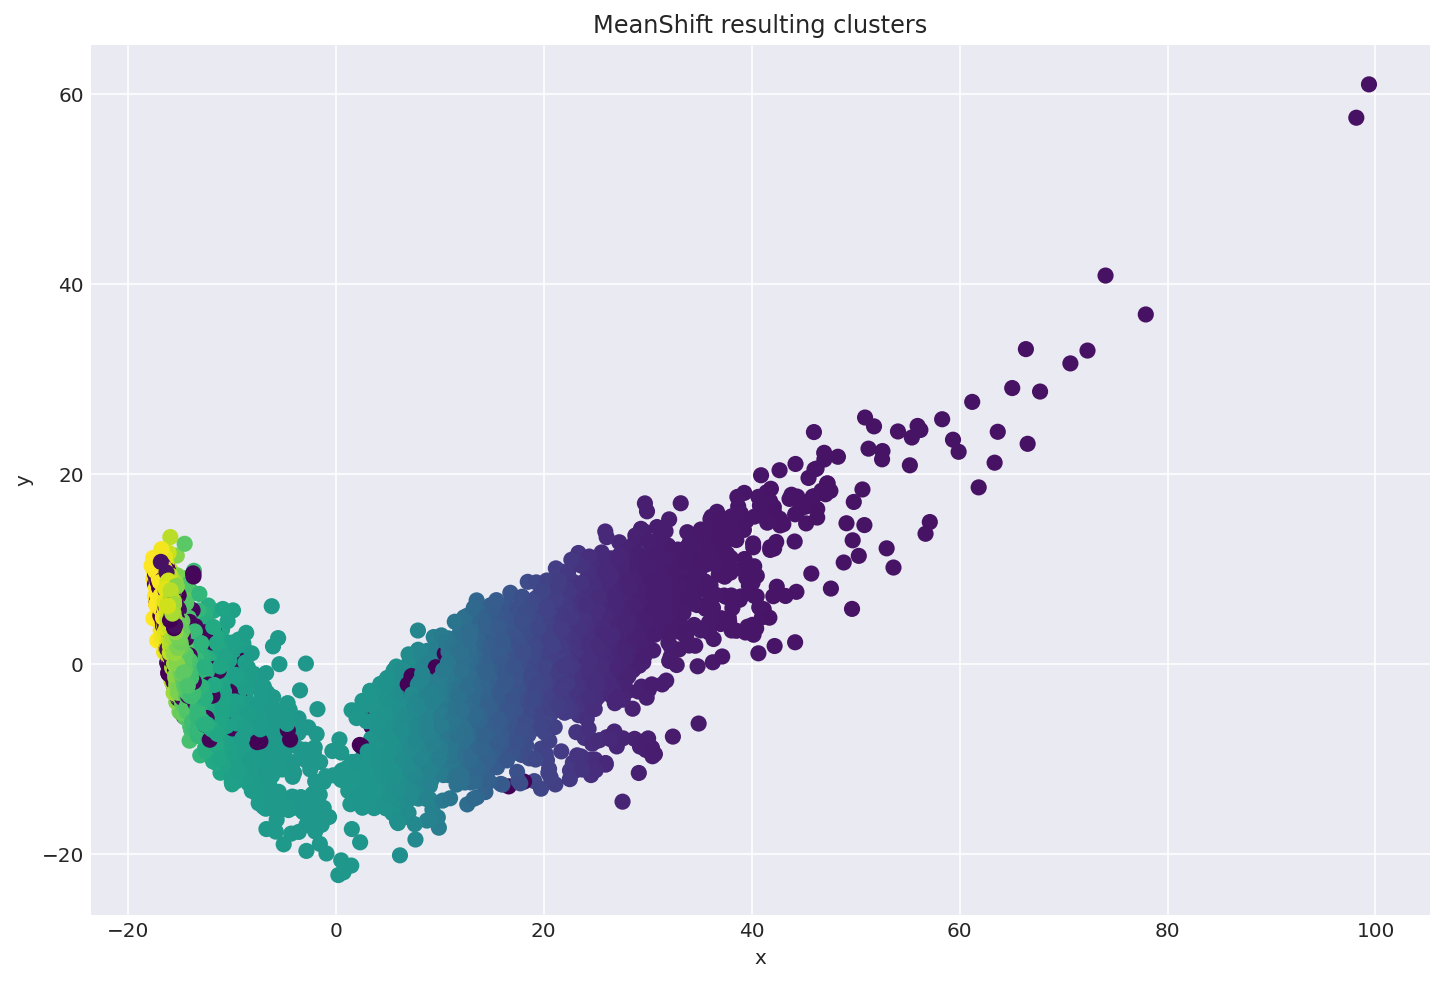

In [29]:
#☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️
plt.figure(figsize=(12,8))
plt.scatter(X_pca[:,0], X_pca[:,1], c=meanshift.labels_, s=50, cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')
plt.title('MeanShift resulting clusters')

In [56]:
#☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️
from sklearn.cluster import Birch


birch = Birch(threshold=4, n_clusters=6)
birch.fit(X_pca)
print('homogeneity_score=', metrics.homogeneity_completeness_v_measure(y, birch.labels_))
print('silhouette_score=', metrics.silhouette_score(X_pca, birch.labels_))
print('accuracy_score=', metrics.accuracy_score(y, birch.labels_))

homogeneity_score= (0.5708133544385577, 0.6434042615434626, 0.6049389169743776)
silhouette_score= 0.13498836365065706
accuracy_score= 0.27915331585590836


Text(0.5, 1.0, 'Birch resulting clusters')

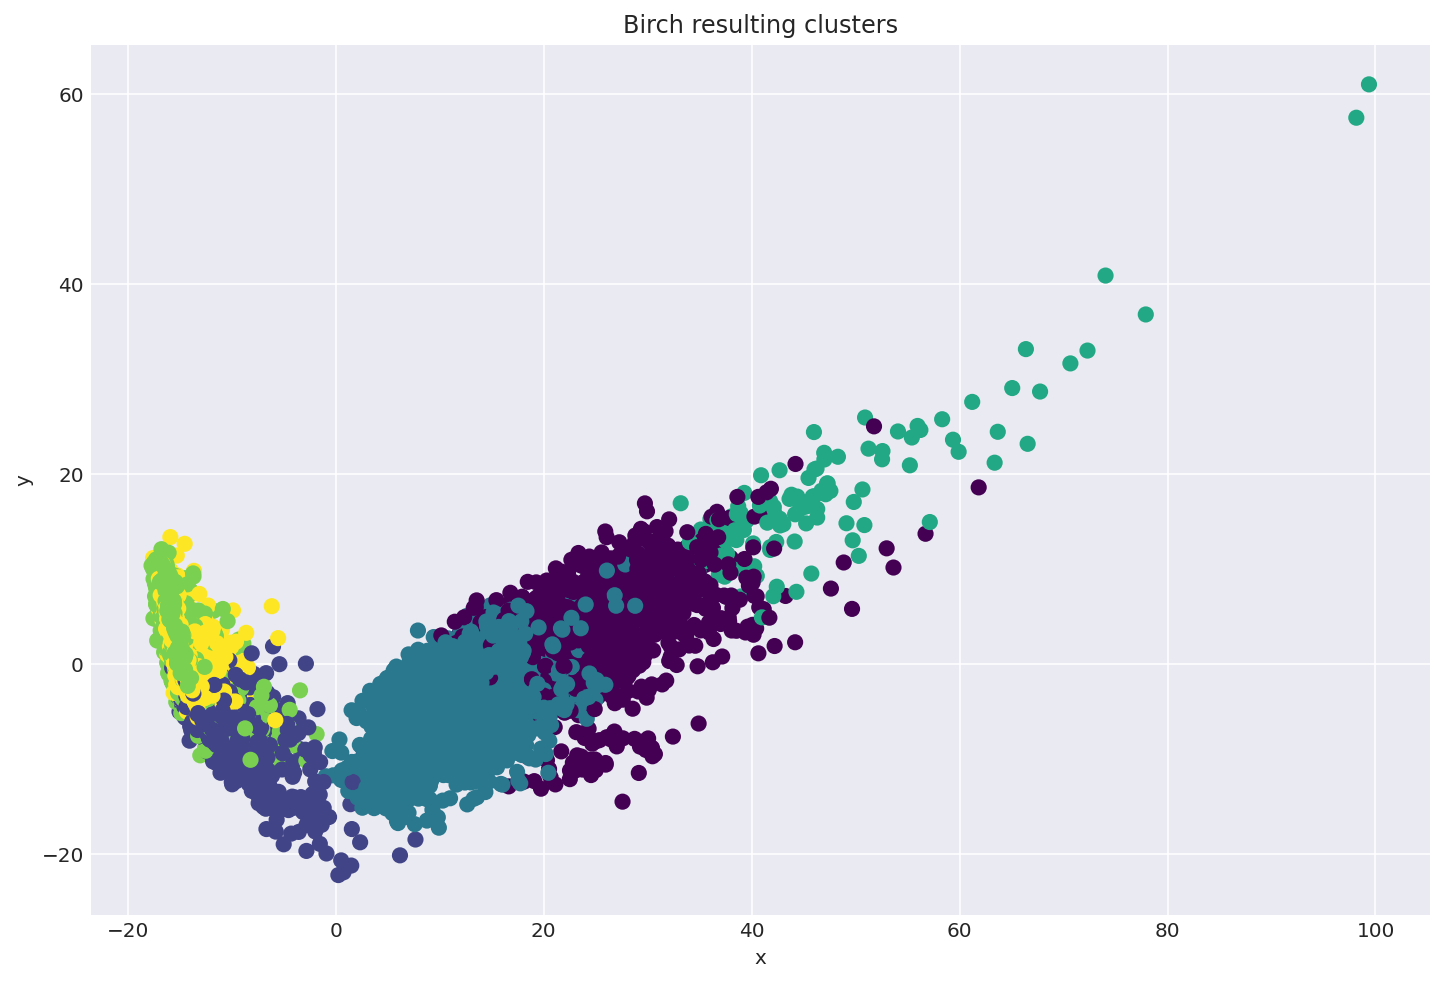

In [57]:
#☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️☁️
plt.figure(figsize=(12,8))
plt.scatter(X_pca[:,0], X_pca[:,1], c=birch.labels_, s=50, cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Birch resulting clusters')

# your text here

### Задание 1.9 (1 балл)
Для самой успешной из полученных кластеризаций попробуйте дать интерпретацию кластеров. Опишите характеристики объектов, попавших в каждый кластер. Для этого можете ответить на следующие вопросы:

* Похожи ли объекты внутри каждого кластера на определенный тип активности человека?
* В каких кластерах смешано несколько типов активности? С чем, на ваш взгляд, это может быть связано?
* Качественная ли получилась кластеризация? На основании чего вы можете сделать такой вывод?

# your text here

## Задание 2. Разделение изображения на семантические компоненты (5 баллов)

![RedPanda](http://imgur.com/6Aa52Lm.png)

Алгоритмы кластеризации могут применяться в самых разных задачах. Например, в анализе изображений есть задача разделения изображения на семантические компоненты, которую можно решать в том числе с помощью алгоритмов кластеризации. 

Проверим их на ```duck.jpg``` и ```owls.jpg```

### Задание 2.0 (0.1 балл)

Откройте изображения, после чего визуализируйте их с помощью ```plt.imshow()```

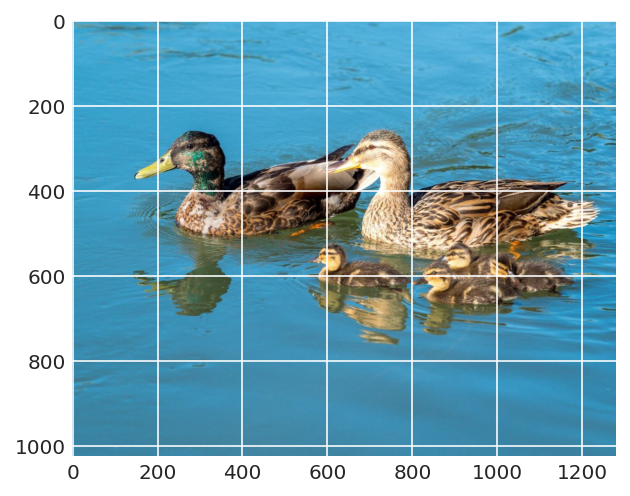

In [4]:
from PIL import Image
im_ducks = Image.open("ducks.jpeg") 
im_owl = Image.open("owl.jpeg")
plt.imshow(im_ducks);

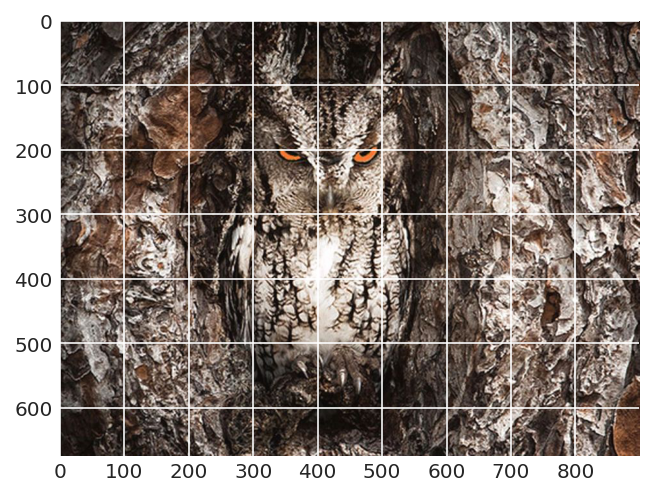

In [43]:
plt.imshow(im_owl);

### Задание 2.1 (1.5 балла)
Для каждого изображения, используя кластеризацию ```KMeans```, выделите компоненты, охарактеризовав каждый пиксель следующим образом: $\psi_i = [\lambda x_i, \lambda y_i, r_i, g_i, b_i]$, где 
$x_i$ и $y_i$ — координаты пикселя, $r_i, g_i, b_i$ — его цвет, $\lambda$ — параметр, выражающий важность пространственной связности перед цветовой похожестью.

Примените полученную функцию, взяв следующие $\lambda$: 0.3 и 1.5 для ```duck.jpg``` и ```owls.jpg``` (или другие, но тогда с вас красивые результаты :) )

Число кластеров подберите разумным образом на свой вкус (в качестве нулевого приближения можно взять 3)

In [49]:
from sklearn.cluster import KMeans


def find_components(image, lmbd, n_clusters):
    X = []
    for idx_i, i in enumerate(np.array(image)):
        for idx_j, j in enumerate(i):
            X.append([lmbd * (idx_i + 1), lmbd * (idx_j + 1), *j])
    X = np.array(X)
    kmeans = KMeans(n_clusters=n_clusters, n_init = 100, random_state=RANDOM_STATE)
    kmeans.fit(X)
    return kmeans.labels_

In [67]:
import matplotlib.pyplot as plt

def plot_contours(image, n_clusters, lmbd):
    im_ducks = np.array(image)
    resulting_labels = find_components(im_ducks, lmbd, n_clusters)
    label = np.reshape(resulting_labels, (im_ducks.shape[0], im_ducks.shape[1]))
    plt.figure(figsize=(5, 5))
    plt.imshow(im_ducks, cmap=plt.cm.gray)
    for l in range(n_clusters):
        plt.contour(
            label == l,
            colors=[
                plt.cm.nipy_spectral(l / float(n_clusters)),
            ],
        )
    plt.axis("off")
    plt.show()

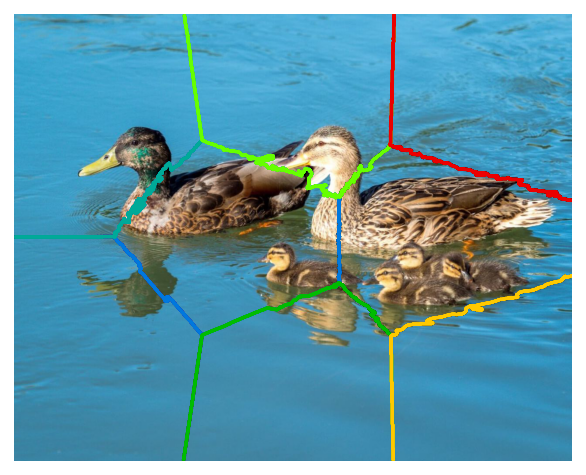

In [69]:
plot_contours(im_ducks, n_clusters=8, lmbd=1.5)

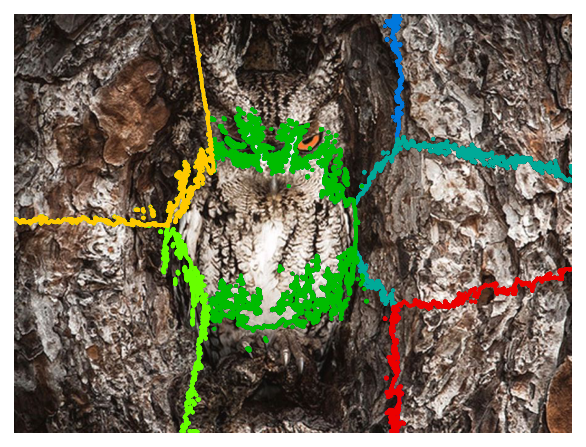

In [70]:
plot_contours(im_owl, n_clusters=8, lmbd=1.5)

### Задание 2.2 (1.5 балла)
Попробуйте выделить сегменты при помощи [спектральной кластеризации](http://scikit-learn.org/stable/modules/clustering.html#spectral-clustering). Обратите внимание на [пример в sklearn](http://scikit-learn.org/0.16/auto_examples/cluster/plot_lena_segmentation.html). Для ускорения работы алгоритма рекомендуется привести изображение к серому цвету. При необходимости можно сжать изображения в 2 раза.

Подсказка: ```skimage``` с его ```color``` и ```transform``` в этом помогут :)

Или же воспользуйтесь аналогичными средствами ```PIL``` или ```cv2``` 

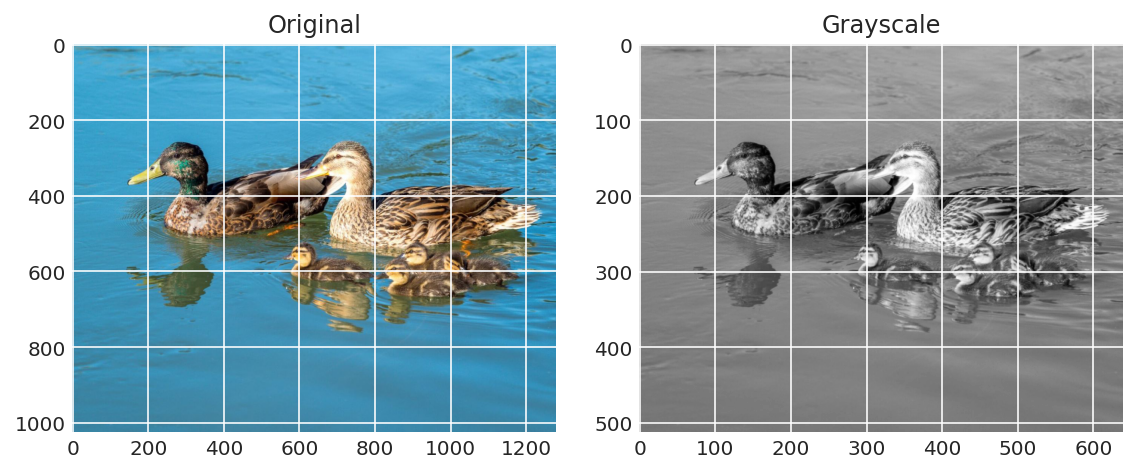

In [43]:
from skimage.color import rgb2gray
from skimage.transform import resize


original = im_ducks
grayscale = rgb2gray(original)
grayscale_resized = resize(grayscale, (grayscale.shape[0] // 2, grayscale.shape[1] // 2),
                       anti_aliasing=True)
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(original)
ax[0].set_title("Original")
ax[1].imshow(grayscale_resized, cmap=plt.cm.gray)
ax[1].set_title("Grayscale")

fig.tight_layout()
plt.show()

In [44]:
def spectral_segmentation(img, n_clusters, beta, eps):
    import time

    import scipy as sp
    import matplotlib.pyplot as plt
    import matplotlib.cm
    from sklearn.feature_extraction import image
    from sklearn.cluster import spectral_clustering
    cmap = matplotlib.cm.get_cmap('Reds')
    # Convert the image into a graph with the value of the gradient on the
    # edges.
    graph = image.img_to_graph(img)

    # Take a decreasing function of the gradient: an exponential
    # The smaller beta is, the more independent the segmentation is of the
    # actual image. For beta=1, the segmentation is close to a voronoi
    graph.data = np.exp(-beta * graph.data / img.std()) + eps

    # Apply spectral clustering (this step goes much faster if you have pyamg
    # installed)

    ###############################################################################
    # Visualize the resulting regions

    for assign_labels in ('kmeans', 'discretize'):
        t0 = time.time()
        labels = spectral_clustering(graph, n_clusters=n_clusters,
                                     assign_labels=assign_labels,
                                     random_state=1)
        t1 = time.time()
        labels = labels.reshape(img.shape)

        plt.figure(figsize=(5, 5))
        plt.imshow(img,   cmap=plt.cm.gray)
        for l in range(n_clusters):
            plt.contour(labels == l, contours=1,
                        colors=[cmap(l / float(n_clusters)), ])
        plt.xticks(())
        plt.yticks(())
        plt.title('Spectral clustering: %s, %.2fs' % (assign_labels, (t1 - t0)))

    plt.show()

/tmp/ipykernel_12262/1588403318.py:36: UserWarning: The following kwargs were not used by contour: 'contours'
  plt.contour(labels == l, contours=1,


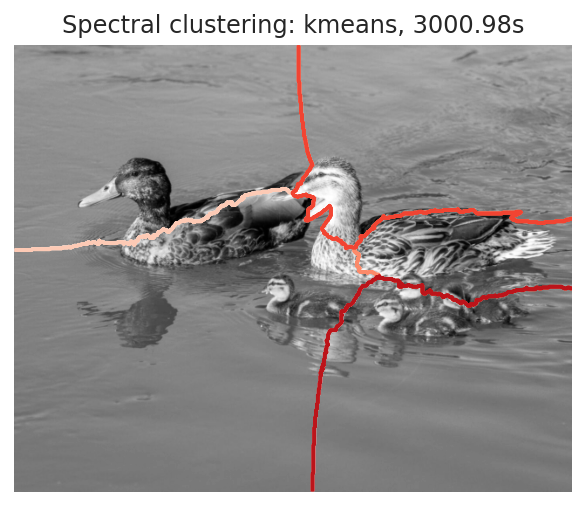

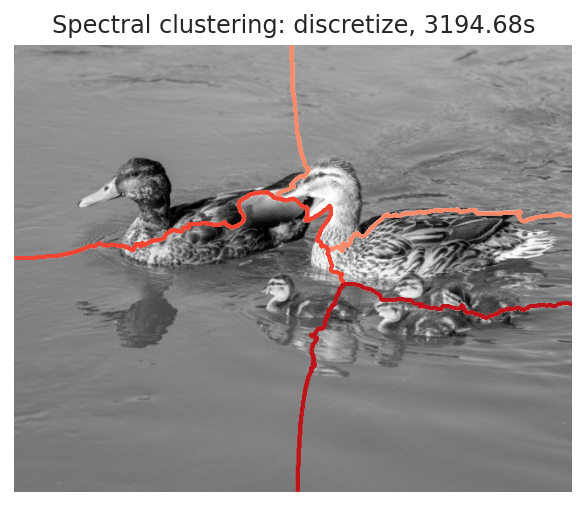

In [45]:
spectral_segmentation(grayscale_resized, 5, beta = 5, eps = 1e-6)

/tmp/ipykernel_12262/1588403318.py:36: UserWarning: The following kwargs were not used by contour: 'contours'
  plt.contour(labels == l, contours=1,


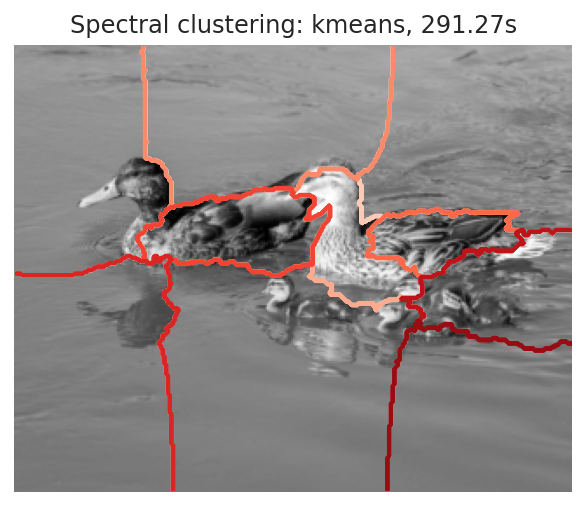

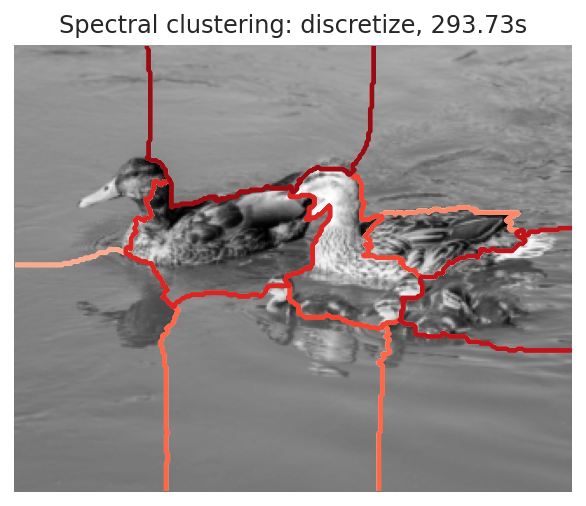

In [47]:
grayscale_resized = resize(grayscale, (grayscale.shape[0] // 4, grayscale.shape[1] // 4),
                       anti_aliasing=True)
spectral_segmentation(grayscale_resized, 10, beta = 5, eps = 1e-6)

### Задание 2.3 (0.9 баллов)
Визуализируйте результаты сегментации (аналогично рисунку в начале задания 2) для обоих методов.

In [ ]:
#your code here

### Задание 2.4 (1 балл)
Найдите интересную картинку милого животного и примените алгоритмы и к ней. Поэкспериментируйте с параметрами алгоритмов. Картинку нужно будет загрузить вместе с работой. Слишком большие лучше не брать - считаться будет долго. Не забудьте визуализировать!

Сравните два подхода и сегментации, к которым они приводят.
Для всех ли изображений в результате сегментации хорошо видны контуры объектов?

In [ ]:
#your code here

# your text here

# Акция
Повеселите проверяющего и вставьте смешной мем. Вдруг повысят балл! Или разместите ваше сообщение о продаже гаража здесь.

[Методичка по мемам](https://www.youtube.com/watch?v=dQw4w9WgXcQ)

# your meme here